<b><span style="font-size: 30px;"> DIFFERENTIALLY PRIVATE MACHINE LEARNING </span></b>

Author: Sukanya Lahkar  
Date: 09-12-2024

<b> INTRODUCTION </b>  
  
Machine learning models have advanced significantly, but their development often relies on vast amounts of data, which can include sensitive personal information. This exposure raises concerns about data privacy, potentially making individuals vulnerable to hackers and cybercriminals. To address these concerns, it is essential for machine learning models to incorporate privacy-preserving algorithms. Differential privacy is one such approach that helps safeguard data by preventing unauthorized access to sensitive information.   

This project aims to explore and apply the learnings from Zhanglong Ji <i>et al.'s</i> (2014) paper, <b>“Differential Privacy and Machine Learning: A Survey and Review,”</b> using an example dataset. The dataset, sourced from Dickson, E.R. <i>et al.'s</i> (1989) paper, <b>“Prognosis in Primary Biliary Cirrhosis: Model for Decision Making,”</b> contains 17 clinical features used to predict the survival state of patients with liver cirrhosis. Since this dataset holds sensitive medical and patient information, it serves as an ideal test case for evaluating differential privacy techniques.  
  
Zhanglong Ji <i>et al.'s</i> (2014) paper primarily addresses how to train a differentially private model with minimal noise while maintaining efficacy. To protect datasets and their outputs from hackers and cybercriminals, the concept of adding noise has been widely adopted. However, while noise addition enhances privacy, it can adversely impact the accuracy and predictive capabilities of machine learning models. Since the efficiency of these models is closely tied to their accuracy, managing the balance between privacy and performance is crucial. 
  
<b> GOALS AND OBJECTIVES </b>  
  
The main objective of this project is to apply the insights gained from Zhanglong Ji <i>et al.'s</i> (2014) paper to the aforementioned real-world dataset and determine whether the questions and findings discussed in their review hold true when implemented practically. Some of the key conclusions from the study conducted by Zhanglong Ji <i>et al.</i> (2014) that will be verified and analyzed are:

1. Adding noise to the dataset only once is more effective than adding noise multiple times.
2. Lower global sensitivity results in smaller noise; this can be achieved by modifying the model, such as using a robust linear regression model instead of more commonly used models.
3. For privacy to be considered "free," the noise introduced to maintain privacy must be less than the noise arising from sample randomness. 

The expected outcome of this project will assess the efficacy of differential privacy in safeguarding data while maintaining model performance on contemporary datasets.

<b> DESCRIPTION OF THE DATASET </b>   
  
The tabular dataset, obtained from UCI’s Machine Learning Repository, is licensed for sharing and adaptation with appropriate citation of Dickson, E.R. <i>et al.'s</i>(1989) paper, “Prognosis in Primary Biliary Cirrhosis: Model for Decision Making.” The data were collected prospectively from trial patients using standardized forms, definitions, and study protocols at entry and yearly intervals. For nontrial patients, baseline data were collected from their medical records. This dataset, comprising 20 features and 418 instances, is well-suited for the purposes of this project as it contains sensitive medical information, such as gender and age. Such sensitive data, when combined with other available information, could potentially be exploited by hackers for malicious activities. Health sector datasets are often prime targets for such breaches, making this dataset particularly relevant for evaluating privacy-preserving techniques. The features of the dataset include:

1. ID: Unique identifier
2. N_Days: Number of days between registration and the earlier of death, transplantation, or the study analysis time in July 1986
3. Status: Status of the patient (C: censored, CL: censored due to liver transplantation, D: death)
4. Drug: Type of drug (D-penicillamine or placebo)
5. Age: Age in days
6. Sex: Gender (M: male, F: female)
7. Ascites: Presence of ascites (N: No, Y: Yes)
8. Hepatomegaly: Presence of hepatomegaly (N: No, Y: Yes)
9. Spiders: Presence of spider angiomas (N: No, Y: Yes)
10. Edema: Presence of edema (N: No edema and no diuretic therapy, S: Edema resolved by diuretics or present without diuretics, Y: Edema despite diuretic therapy)
11. Bilirubin: Serum bilirubin level in mg/dl
12. Cholesterol: Serum cholesterol level in mg/dl
13. Albumin: Albumin level in gm/dl
14. Copper: Urine copper level in µg/day
15. Alk_Phos: Alkaline phosphatase level in U/liter
16. SGOT: SGOT (Serum Glutamic-Oxaloacetic Transaminase) level in U/ml
17. Triglycerides: Triglycerides level in mg/dl
18. Platelets: Platelets per cubic ml/1000
19. Prothrombin: Prothrombin time in seconds
20. Stage: Histologic stage of the disease (1, 2, 3, or 4)   
  
Below, the dataset has been loaded and assessed for quality, revealing the presence of missing values but no duplicate entries. To address this, the missing values in numerical columns are replaced with the median of their respective columns, while the missing values in categorical or object columns are filled with the most frequent value (mode) of those columns. Additionally, categorical values are converted to category codes to facilitate their use in the machine learning models. 
A summary statistics of the transformed dataset has also been generated.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sklearn.exceptions import ConvergenceWarning

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#Load data
import pandas as pd
df = pd.read_csv(r"C:\Users\asus\Documents\Data Ethics\cirrhosis.csv")
df.shape

(418, 20)

In [2]:
if df.isnull().sum().any():    #Check for missing values
    print("There are missing values in the dataset")
else: 
    print("No missing values") 
print("Number of duplicate data entries:", df.duplicated().sum())  #Check for duplicates

There are missing values in the dataset
Number of duplicate data entries: 0


In [3]:
df_original = df.copy()  #Keeping the original dataset as is
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
objcol = df.select_dtypes(include=['object']).columns
#Filling missing values in numerical columns with the median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
# Filling missing values in object columns with the mode
for col in objcol:
    df[col] = df[col].fillna(df[col].mode()[0])

In [4]:
if df.isnull().sum().any():    #Check and confirm for missing values again
    print("There are missing values in the dataset")
else: 
    print("No missing values") 

No missing values


In [5]:
df = df.drop(['ID','N_Days'], axis=1)  #dropping insignificant columns from the dataset
df[objcol] = df[objcol].astype('category')
categorical_columns = df.select_dtypes(include='category').columns
#Converting all categorical columns to category codes
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.cat.codes)
df.head()

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Before proceeding with the implementations, the class distribution of the dataset has been examined to assess the balance among the classes. It is observed that there are only 25 instances of class 1 labels. To prevent any potential bias or imbalance from affecting the model's performance, all data with a "Status" label of 1 has been removed. It is important to note that the primary objective of this project is not to develop a model that accurately predicts all class labels, but rather to study the impact of noise on data protection and its effects on model performance.

In [6]:
print("Class distribution:", df['Status'].value_counts())
df = df[df['Status'] != 1]
X = df.drop('Status', axis=1)
y = df['Status']

Class distribution: Status
0    232
2    161
1     25
Name: count, dtype: int64


<b> METHODOLOGIES, IMPLEMENTATION AND ANALYSIS OF THE RESULTS </b>  
  
<font color = blue><b><i> Case 1: Adding noise to the dataset only once is more effective than adding noise multiple times. </b></i></font>

<b><i>Method</b></i> - To evaluate the effectiveness of adding noise to a dataset, in the below code, a comparative analysis is conducted using logistic regression with cross-validation. In the first scenario, Laplacian noise is added once using a fixed privacy budget (ϵ = 1). A privacy budget in differential privacy quantifies the allowable data exposure, balancing privacy protection and data utility by limiting cumulative privacy loss. In the second scenario, the same privacy budget is distributed across multiple iterations, introducing cumulative noise. Performance metrics including accuracy, precision, and recall are calculated using stratified K-fold cross-validation. The mean and standard deviation of these metrics are then compared for the two models. Also, there are 232 data instances having class label 0 and 161 instances having Class label 2. So, 'class_weight=balanced' is set in the Logistic Regression modeling to adjust the weights based on class frequencies, to make sure there is no affect due to the imbalance of the dataset.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, precision_score, recall_score
import numpy as np

#Function to add Laplacian noise
def add_noise(data, epsilon=1.0, method='laplace', n_iterations=1, random_state=None):
    np.random.seed(random_state)
    scaled_epsilon = epsilon / n_iterations 
    noise = np.random.laplace(loc=0, scale=1/scaled_epsilon, size=data.shape)
    return data + noise

#Cross-Validation function with additional metrics
def cross_validate_model(X, y, model=None, n_splits=5, random_state=42):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  #Scaling the features for Logistic Regression
    
    if model is None:
        model = LogisticRegression(max_iter=500, random_state=random_state, class_weight='balanced')
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    precision = cross_val_score(model, X_scaled, y, cv=kf, scoring=make_scorer(precision_score, average='weighted'))
    recall = cross_val_score(model, X_scaled, y, cv=kf, scoring=make_scorer(recall_score, average='weighted'))
    accuracy = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    
    return accuracy.mean(), accuracy.std(), precision.mean(), precision.std(), recall.mean(), recall.std()

epsilon = 1 #Privacy budget
n_iterations = 5  #Number of times noise is added

#Scenario 1: Noise added once
X_noisy_once = add_noise(X.copy(), epsilon=epsilon, method='laplace', random_state=42)
mean_acc_once, std_acc_once, mean_prec_once, std_prec_once, mean_recall_once, std_recall_once = cross_validate_model(X_noisy_once, y, n_splits=5, random_state=42)

#Scenario 2: Noise added multiple times with cumulative noise effect
cum_noisy_datasets = []
for i in range(n_iterations):
    X_noisy = add_noise(X.copy(), epsilon=epsilon, method='laplace', n_iterations=n_iterations, random_state=42 + i)
    cum_noisy_datasets.append(X_noisy)

#Aggregating the noisy datasets and calculating cumulative noise for Scenario 2
cum_X_noisy = np.mean(cum_noisy_datasets, axis=0)  
cum_noise_effect = np.std(cum_noisy_datasets, axis=0) * np.sqrt(n_iterations)
mean_acc_mul, std_acc_mul, mean_prec_mul, std_prec_mul, mean_recall_mul, std_recall_mul = cross_validate_model(cum_X_noisy, y, n_splits=5, random_state=42)

#Results display
print("Cross-Validation Results (Noise Added Once):")
print(f"Mean Accuracy: {mean_acc_once:.4f}, Std Dev: {std_acc_once:.4f}")
print(f"Mean Precision: {mean_prec_once:.4f}, Std Dev: {std_prec_once:.4f}")
print(f"Mean Recall: {mean_recall_once:.4f}, Std Dev: {std_recall_once:.4f}")

print("\nCross-Validation Results (Noise Added Multiple Times):")
print(f"Mean Accuracy: {mean_acc_mul:.4f}, Std Dev: {std_acc_mul:.4f}")
print(f"Mean Precision: {mean_prec_mul:.4f}, Std Dev: {std_prec_mul:.4f}")
print(f"Mean Recall: {mean_recall_mul:.4f}, Std Dev: {std_recall_mul:.4f}")

print(f"\nCumulative Noise Effect (Std Dev): {cum_noise_effect.mean():.4f}")

Cross-Validation Results (Noise Added Once):
Mean Accuracy: 0.7656, Std Dev: 0.0750
Mean Precision: 0.7731, Std Dev: 0.0742
Mean Recall: 0.7656, Std Dev: 0.0750

Cross-Validation Results (Noise Added Multiple Times):
Mean Accuracy: 0.7223, Std Dev: 0.0749
Mean Precision: 0.7285, Std Dev: 0.0738
Mean Recall: 0.7223, Std Dev: 0.0749

Cumulative Noise Effect (Std Dev): 12.6718


<b><i>Output Analysis</b></i> - As can be observed from the output above, the performance metrics (accuracy, precision, and recall) are consistently higher when noise is added only once compared to multiple noise additions. Adding noise once results in a significant improvement of the model accuracy (76.56% vs. 72.23%). For precision and recall metrics also, both are higher when noise is added once (77.31% vs. 72.85% for precision, 76.56% vs. 72.23% for recall). The cumulative noise effect (12.6718) remains high, which negatively impacts the results when noise is added multiple times.

<font color = blue><b><i> Case 2: Lower global sensitivity results in smaller noise; this can be achieved by modifying the model, such as using a robust linear regression model instead of more commonly used models. </b></i></font>  

<b><i>Method</b></i> - Global sensitivity determines the magnitude of noise added in differential privacy, with higher sensitivity requiring more noise to ensure stronger privacy protection. In the following code block, to evaluate the effect of global sensitivity on noise magnitude in differential privacy, two models: Kernel SVM, which has higher sensitivity due to complex decision boundaries, and Linear SVM, which has lower sensitivity due to its simpler linear nature, has been compared. Arbitrarily, sensitivity values of 2 and 1 have been assigned to kernel SVM and linear SVM for simplification purposes. Laplacian noise proportional to each model's sensitivity is also added to the dataset, and performance metrics (accuracy, precision, and recall) are evaluated using stratified K-fold cross-validation. The noise scale of the two models, computed by dividing each model's global sensitivity by the privacy budget (ϵ = 1.5), are also compared.

In [8]:
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_classification

#Function to add Laplacian noise proportional to sensitivity
def add_noise2(data, sensitivity, epsilon=1.5, random_state=None):
    np.random.seed(random_state)
    scale = sensitivity / epsilon
    noise = np.random.laplace(loc=0, scale=scale, size=data.shape)
    return data + noise

sensitivity_kernel_svm = 2.0  #Assuming higher sensitivity for kernel SVM due to its complex decision boundaries
sensitivity_linear_svm = 1.0  #Assuming Lower sensitivity for linear SVM due to its simpler linear nature
epsilon_new = 1.5

#Adding noise to the data
X_noisy_kernel = add_noise2(X.copy(), sensitivity=sensitivity_kernel_svm, epsilon=epsilon_new, random_state=42)
X_noisy_linear = add_noise2(X.copy(), sensitivity=sensitivity_linear_svm, epsilon=epsilon_new, random_state=42)

#Kernel SVM model
kernel_svm = SVC(kernel='rbf', C=1.0, random_state=42)
mean_acc_kernel, std_acc_kernel, mean_prec_kernel, std_prec_kernel, mean_rec_kernel, std_rec_kernel = cross_validate_model(X_noisy_kernel, y, kernel_svm, random_state=42)

#Linear SVM model
linear_svm = LinearSVC(C=1.0, random_state=42, max_iter=5000)
mean_acc_linear, std_acc_linear,  mean_prec_linear, std_prec_linear, mean_rec_linear, std_rec_linear = cross_validate_model(X_noisy_linear, y, linear_svm, random_state=42)

#Results display
print("Cross-Validation Results:")
print(f"Kernel SVM (Higher Sensitivity) -> Mean Accuracy: {mean_acc_kernel:.4f}, Std Dev: {std_acc_kernel:.4f}")
print(f"Kernel SVM (Higher Sensitivity) -> Mean Precision: {mean_prec_kernel:.4f}, Std Dev: {std_prec_kernel:.4f}")
print(f"Kernel SVM (Higher Sensitivity) -> Mean Recall: {mean_rec_kernel:.4f}, Std Dev: {std_rec_kernel:.4f}")
print()
print(f"Linear SVM (Lower Sensitivity) -> Mean Accuracy: {mean_acc_linear:.4f}, Std Dev: {std_acc_linear:.4f}")
print(f"Linear SVM (Lower Sensitivity) -> Mean Precision: {mean_prec_linear:.4f}, Std Dev: {std_prec_linear:.4f}")
print(f"Linear SVM (Lower Sensitivity) -> Mean Recall: {mean_rec_linear:.4f}, Std Dev: {std_rec_linear:.4f}")

#Comparison of Noise Scale
print("\nNoise Scales:")
print(f"Kernel SVM Noise Scale: {sensitivity_kernel_svm / epsilon_new:.4f}")
print(f"Linear SVM Noise Scale: {sensitivity_linear_svm / epsilon_new:.4f}")


Cross-Validation Results:
Kernel SVM (Higher Sensitivity) -> Mean Accuracy: 0.7453, Std Dev: 0.0609
Kernel SVM (Higher Sensitivity) -> Mean Precision: 0.7458, Std Dev: 0.0659
Kernel SVM (Higher Sensitivity) -> Mean Recall: 0.7453, Std Dev: 0.0609

Linear SVM (Lower Sensitivity) -> Mean Accuracy: 0.7607, Std Dev: 0.0636
Linear SVM (Lower Sensitivity) -> Mean Precision: 0.7622, Std Dev: 0.0679
Linear SVM (Lower Sensitivity) -> Mean Recall: 0.7607, Std Dev: 0.0636

Noise Scales:
Kernel SVM Noise Scale: 1.3333
Linear SVM Noise Scale: 0.6667


<b><i>Output Analysis</b></i> - The results above show the relationship between global sensitivity, the noise scale introduced to preserve privacy, and the resulting utility of the models. The Kernel SVM has higher global sensitivity (2.0), resulting in larger noise (noise scale is 1.333) being added to the dataset. The Linear SVM, with lower sensitivity (1.0), requires less noise (noise scale is 0.6667) to achieve the same level of privacy. Moreover, The Linear SVM (Lower Sensitivity) performs better in terms of mean accuracy (0.7607), precision (0.7622), and recall (0.7607) compared to the Kernel SVM (Higher Sensitivity), which has slightly lower utility metrics (accuracy being 0.7453, precision 0.7458, and recall around 0.7453). 

<font color = blue><b><i> Case 3: For privacy to be considered "free," the noise introduced to maintain privacy must be less than the noise arising from sample randomness. </b></i> </font> 
  
<b><i>Method</b></i> - To evaluate when privacy noise becomes "free", the magnitude of privacy noise to the inherent sample randomness in the dataset has been compared in the below code snippet. Sample randomness noise is calculated as the standard deviation of the model accuracies from multiple random train-test splits. Privacy noise is introduced by adding Laplacian noise with two different privacy budgets: high (ϵ=42.0) and low (ϵ=0.5). High value of privacy budget means less noise to be added while low value of privacy budget indicate more noise to be added. The function 'add_noise2' from the above code is utilised/ reused to add the privacy noise for the two different scenarios here. The noise magnitudes are then visualized using a bar chart and compared.

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 3 artists>

Text(0, 0.5, 'Noise Magnitude')

Text(0.5, 1.0, 'Comparison of Noise: Sample Randomness vs Privacy Noise')

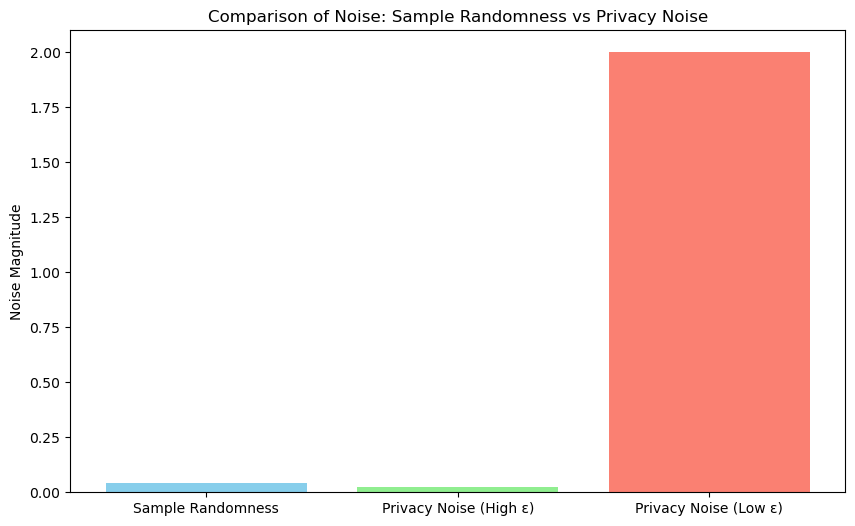

Noise Magnitudes:
Sample Randomness Noise: 0.0421
Privacy Noise (High ε): 0.0238
Privacy Noise (Low ε): 1.9985

Model Performance:
High Privacy Budget (ε=42.0): Mean Accuracy = 0.7835, Std Dev = 0.0518
Low Privacy Budget (ε=0.5): Mean Accuracy = 0.7073, Std Dev = 0.0656


In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Defining the function to calculate sample randomness noise
def calculate_sample_randomness(X, y, model, n_splits=5):
    accuracies = []
    for _ in range(n_splits):
        #Randomly splitting the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.randint(100))
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return np.std(accuracies) 

#Calculating sample randomness noise
sample_randomness_noise = calculate_sample_randomness(X, y, linear_svm)

#Adding privacy noise for two scenarios
#Scenario 1: Privacy noise less than sample randomness
epsilon_high = 42.0  #High privacy budget
X_noisy_high = add_noise2(X.copy(), sensitivity=1.0, epsilon=epsilon_high, random_state=42)

#Scenario 2: Privacy noise greater than sample randomness
epsilon_low = 0.5  #Low privacy budget
X_noisy_low = add_noise2(X.copy(), sensitivity=1.0, epsilon=epsilon_low, random_state=42)

#Evaluating the privacy noise magnitudes
privacy_noise_high = np.mean(np.abs(X_noisy_high - X)) 
privacy_noise_low = np.mean(np.abs(X_noisy_low - X))

#Visualizing the comparison using bar chart
labels = ['Sample Randomness', 'Privacy Noise (High ε)', 'Privacy Noise (Low ε)']
values = [sample_randomness_noise, privacy_noise_high, privacy_noise_low]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Noise Magnitude')
plt.title('Comparison of Noise: Sample Randomness vs Privacy Noise')
plt.show();

#Evaluating the model performances
# High privacy budget
mean_acc_high, std_acc_high, mean_prec_high, std_prec_high, mean_rec_high, std_rec_high = cross_validate_model(
    X_noisy_high, y, linear_svm, random_state=42
)

# Low privacy budget
mean_acc_low, std_acc_low, mean_prec_low, std_prec_low, mean_rec_low, std_rec_low = cross_validate_model(
    X_noisy_low, y, linear_svm, random_state=42
)

#Results display
print("Noise Magnitudes:")
print(f"Sample Randomness Noise: {sample_randomness_noise:.4f}")
print(f"Privacy Noise (High ε): {privacy_noise_high:.4f}")
print(f"Privacy Noise (Low ε): {privacy_noise_low:.4f}")

print("\nModel Performance:")
print(f"High Privacy Budget (ε=42.0): Mean Accuracy = {mean_acc_high:.4f}, Std Dev = {std_acc_high:.4f}")
print(f"Low Privacy Budget (ε=0.5): Mean Accuracy = {mean_acc_low:.4f}, Std Dev = {std_acc_low:.4f}")


<b><i>Output Analysis</b></i> - From the output provided as well as from the bar diagram above, it can be observed that the sample randomness noise is 0.0421. The privacy noise, having high privacy budget, is 0.023, that is smaller than the sample randomness noise. On the other hand, the privacy noise having low privacy budget, is 1.9985, which is significantly larger than the sample randomness noise. As for the model performance, when the privacy budget is high (42.0), the mean accuracy of the model is 0.7835 with a standard deviation of 0.0518. When the privacy budget is low (0.5), the mean accuracy decreases to 0.7073 with a standard deviation of 0.0656.</b>

<b> DISCUSSION </b>     
  
Adding noise multiple times introduces cumulative distortion, significantly degrading the model’s performance compared to adding noise only once. Each iteration amplifies data distortion, disrupting essential patterns and correlations in the features. This cumulative effect results in a dataset that no longer reflects real-world distributions, causing the model to struggle with learning meaningful relationships and reducing its ability to generalize to unseen data. Thus, adding noise only once with a well-calibrated privacy budget preserves the model's utility while maintaining privacy.

Secondly, models with higher sensitivity require larger noise to ensure the same privacy level because their outputs change more significantly when individual data points are added or removed, as observed in the comparison between Kernel SVM and Linear SVM. The Linear SVM, with lower sensitivity, required less noise and demonstrated better performance across accuracy, precision, and recall metrics. Kernel SVM is highly sensitive to individual data points due to its transformation into a higher-dimensional space. But for Linear SVM, small changes in the data result in smaller adjustments to the model. Thus, reducing global sensitivity through simpler, robust models can preserve more data utility while satisfying privacy constraints, making it a crucial design consideration in privacy-preserving machine learning.

Lastly, it can be said that privacy noise can be considered "free" when it is smaller than the inherent sample randomness in the data. In such cases, the added noise does not significantly impact the model's performance since the model is already exposed to natural data variability. However, when the privacy noise exceeds the sample randomness, model performance declines noticeably because the added noise overwhelms the true data signal. In differential privacy, noise is injected to mask individual data points, ensuring privacy. If this noise is too large relative to the natural variability (sample randomness) in the data, the model struggles to learn meaningful patterns, reducing accuracy and predictive performance. This highlights the importance of balancing privacy budgets with data characteristics to maintain acceptable model accuracy while ensuring strong privacy protection.

<b> LIMITATIONS </b>  
  
Despite the valuable insights gained from the above analysis, several limitations should be considered. The sensitivity values used for the models (Linear SVM and Kernel SVM) were assumed based on theoretical understanding rather than computed from actual data distributions. This simplification may affect the precision of noise calculations. Future work could incorporate data-driven sensitivity estimation for greater accuracy. Moreover, the evaluation was performed on a single dataset, limiting the generalizability of findings. Testing the approach on diverse datasets with different characteristics (e.g., sizes, feature distributions, and class imbalances) could strengthen the three conclusions. Additionally, the Laplacian distribution was used to introduce privacy noise due to its common use in differential privacy. However, other noise mechanisms such as Gaussian noise could be explored, especially in scenarios where alternative privacy definitions like (ϵ,δ)-differential privacy are considered. Also, only Logistic Regression, Linear SVM, and Kernel SVM models were evaluated. Expanding the study to include more models, such as ensemble-based methods or neural networks, could offer broader insights into privacy-utility trade-offs. The evaluation relied on standard classification metrics like accuracy, precision, and recall. Incorporating other utility measures such as F1-score, AUC-ROC, or model interpretability could provide a more comprehensive assessment of performance. Addressing these limitations through further research and extended experimentation can improve the robustness and applicability of the findings, helping to advance privacy-preserving machine learning practices.

<b> CONCLUSION </b>  
  
The evaluation of the medical dataset considered in this project, through the three privacy-preserving analyses, highlights critical strategies for safeguarding sensitive health information. Adding noise to the dataset only once ensures that patient data remains useful for predictive modeling while minimizing distortion. This approach preserves essential features like bilirubin and albumin levels, which are crucial for predicting patient survival. Secondly, lowering global sensitivity by using robust models such as linear regression reduces the amount of noise needed for privacy, helping retain meaningful patterns in clinical indicators like cholesterol and prothrombin levels. Lastly, ensuring that privacy noise remains smaller than the dataset's inherent sample randomness helps maintain the predictive accuracy of survival models while protecting sensitive details. These principles help to enable the safe use of medical datasets in clinical research and decision-making.

While adding noise multiple times increases privacy guarantees under specific differential privacy frameworks, it comes at a significant performance cost. Therefore, evaluating the trade-off between stricter privacy requirements and acceptable performance degradation is essential. In applications demanding higher privacy guarantees, adding noise multiple times may still be justified, despite the observed performance reduction. Ultimately, selecting a suitable privacy mechanism should depend on the intended use case and its privacy-performance requirements.

<b> REFERENCES </b>  
1. https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1
2. Dickson, E., Grambsch, P., Fleming, T., Fisher, L., & Langworthy, A. (1989). Cirrhosis Patient Survival Prediction [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5R02G.
3. https://pandas.pydata.org/docs/index.html
4. https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/
5. https://desfontain.es/blog/large-epsilons.html
6. https://programming-dp.com/cover.html